In [1]:
!python -V

Python 3.7.6


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [7]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [10]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df['duration'] = df['duration'].apply(lambda td:td.total_seconds())
df.duration = df.duration.apply(lambda td: td / 60)

In [11]:
df['duration'].dropna().quantile([0.0, 0.05, .5, .90, .95, .97, .98, .99])

0.00     0.016667
0.05     3.016667
0.50    13.400000
0.90    35.633333
0.95    47.250000
0.97    57.750000
0.98    66.133333
0.99    90.300000
Name: duration, dtype: float64

In [12]:
df['duration'].mean()

19.167224093791006

In [13]:
df.loc[df['PUlocationID'].isnull(),'PUlocationID'] = -1
df.loc[df['DOlocationID'].isnull(),'DOlocationID'] = -1
n = df.shape[0]
m = df.loc[df['PUlocationID']==-1].shape[0]
print(m,n,m*100/n)

958267 1154112 83.03067639882438


In [14]:
# df.duration = df.duration.apply(lambda td: td / 60)

In [15]:
df['duration'].mean()

19.167224093791006

In [16]:
df  = df.loc[(df['PUlocationID']!=-1) & (df['DOlocationID']!=-1)]
df.shape

(184404, 8)

In [17]:
df['duration'].dropna().quantile([0.0, 0.05, .5, .8, .85, .90, .95, .97, .98, .99])

0.00     0.016667
0.05     2.600000
0.50    16.000000
0.80    30.000000
0.85    35.000000
0.90    42.100000
0.95    56.097500
0.97    63.766667
0.98    74.150000
0.99    96.632333
Name: duration, dtype: float64

In [18]:
df.loc[df['duration']<2.5].shape[0]*100.0/df.shape[0]

4.877334548057526

In [19]:
df['duration'].std()

43.133285212998416

In [20]:
df = df.loc[df['duration']<=57.0]
df = df.loc[df['duration']>=2.5]
df.shape

(166554, 8)

In [19]:
# df['duration'] = df['duration'].apply(lambda x:x*60)

In [21]:
# df['duration'] = df['duration'].apply(lambda x:x/60)

In [22]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)

In [23]:

train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(X_train.shape)
target = 'duration'
y_train = df[target].values

# lr = LinearRegression(normalize=True)
lr = RidgeCV()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

(166554, 522)


10.42061975518657

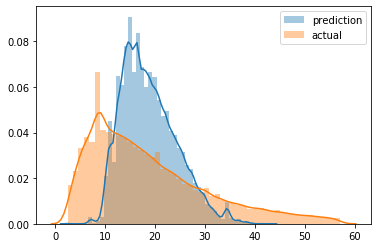

In [24]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [25]:
df_val = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val['duration'] = df_val['duration'].apply(lambda td:td.total_seconds())
df_val['duration'] = df_val['duration'].apply(lambda x:x/60)

In [26]:
df_val.loc[df_val['PUlocationID'].isnull(),'PUlocationID'] = -1
df_val.loc[df_val['DOlocationID'].isnull(),'DOlocationID'] = -1
df_val  = df_val.loc[(df_val['PUlocationID']!=-1) & (df_val['DOlocationID']!=-1)]
df_val.shape

(140330, 8)

In [27]:
df_val = df_val.loc[df_val['duration']<=57.0]
df_val = df_val.loc[df_val['duration']>=2.5]
df_val.shape

(125126, 8)

In [28]:
categorical = ['PUlocationID', 'DOlocationID']
df_val[categorical] = df_val[categorical].astype(str)

In [29]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
print(X_val.shape)
target = 'duration'
y_val = df_val[target].values
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

(125126, 522)


10.913921815951987

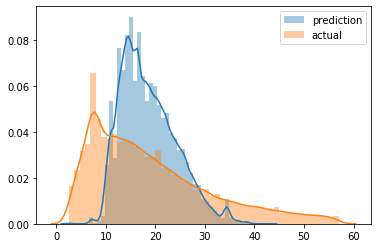

In [31]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [10]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [11]:
len(df_train), len(df_val)

(73908, 61921)

In [12]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [13]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [14]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.479513631630414

In [16]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [17]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.167275941179728